Milestone 2: Data Manipulation & Data Visualization 

Rohit Vakkalagadda (rv324@cornell.edu) Kaitlyn Lu (kl995@cornell.edu) Lucas He (th689@cornell.edu)


Data Manipulation: implement a function for each of the following, and create 3+ tests per part as you go.
- Given a dataframe, removes all rows that have NaN data.
- Given a dataframe, replace all NaNs with a summary statistic of your choice.
- Given a column of categorical data and an exhaustive list of labels, returns a one-hot encoding.
- Load the dataset from your directory into a pandas dataframe.
  * Clean your dataset by removing or replacing NaNs.
  * Report any summary statistics about your dataframe.
    1. For each numerical column, mean, median, min, max, std.
    2. For each categorical column, unique values, counts of each.

In [6]:
# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os



In [7]:
# Remove NaN functions

# Given a dataframe, removes all rows that have NaN data.
def remove_nan_rows(df):
    return df.dropna(axis = 0)

# Given a dataframe, replace all NaNs with a summary statistic of your choice.
def replace_nan_with_mean(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        if df_copy[col].isna().any():
            df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    return df_copy

# Given a column of categorical data and an exhaustive list of labels, returns a one-hot encoding.
def one_hot_encode(column, labels):
    return pd.get_dummies(column, prefix=column.name).reindex(columns=[f"{column.name}_{label}" for label in labels], fill_value=0)


In [10]:
# Import Data set and clean 

df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# Replace NaN values with mean
df = df.drop(columns=['Date Rptd', 'DATE OCC', 'Status', 'Status Desc', 'Vict Descent', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Weapon Used Cd', 'Weapon Desc'])
df = df[df['Vict Age'] != 0]
df = remove_nan_rows(df)
print(df.columns)
print(df.shape)
df.head()

Index(['DR_NO', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd',
       'Premis Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')
(114273, 17)


,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Premis Desc,LOCATION,Cross Street,LAT,LON
19,200606074,1615,6,Hollywood,646,2,805,PIMPING,1300 1402,23,F,101.0,STREET,HOLLYWOOD,MC CADDEN,34.1016,-118.3370
46,201225656,2245,12,77th Street,1268,1,210,ROBBERY,0344 0305 0355,21,M,101.0,STREET,SAN PEDRO,85TH ST,33.9610,-118.2695
64,201210786,2035,12,77th Street,1259,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 2024 0445 0411 1218 2033,26,F,103.0,ALLEY,74TH ST,AVALON,33.9730,-118.2652
67,200506268,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0319 0344 0429 0448 0305,29,F,102.0,SIDEWALK,PACIFIC COAST,VERMONT,33.7926,-118.3043
69,200206940,1255,2,Rampart,216,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0202 1309 1310 0906 0302 1100 0430,28,M,101.0,STREET,BELLEVUE AV,CORONADO ST,34.0751,-118.2717


In [14]:
# Summary Statistics

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Summary statistics for numerical columns
numerical_summary = df[numerical_columns].describe().T

# Summary statistics for categorical columns (Unique values & value counts)
categorical_summary = {col: df[col].value_counts() for col in categorical_columns}


# Display categorical summaries
for col, counts in categorical_summary.items():
    print(f"\nSummary for {col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(counts)


Summary for AREA NAME:
Unique values: 21
AREA NAME
Central        12672
77th Street     9763
Newton          8260
Southwest       7292
Hollywood       7244
Southeast       7234
Olympic         7071
Rampart         6957
Pacific         5021
Wilshire        4539
N Hollywood     4105
Hollenbeck      3860
Northeast       3731
Harbor          3675
Mission         3581
West LA         3570
Van Nuys        3566
West Valley     3304
Foothill        3139
Devonshire      2870
Topanga         2819
Name: count, dtype: int64

Summary for Crm Cd Desc:
Unique values: 121
Crm Cd Desc
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             19000
BATTERY - SIMPLE ASSAULT                                   14551
BURGLARY FROM VEHICLE                                      12199
ROBBERY                                                    11765
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     7608
                                                           ...  
BIKE - ATTEMPTED STOLEN           

Data Visualization: For your cleaned dataset do the following. You do not need
to run tests for these, but save them using plt.savefig(). What patterns or
relationships do you notice?  
a. For each numerical column, create a histogram (with labels) of the data.  
b. For each categorical column, create a bar graph (with labels + coloring).  
c. Select 3+ pairs of numerical and categorical columns, and for each
generate and save a violin plot.  
d. Select 3+ pairs of numerical columns, and for each create scatter/joint
plots for each.  
e. Create a confusion matrix or correlation plot for a set of features. To
include categorical features, you may want to use your one-hot encoding
from above.  
f. Investigate an interesting pattern or relationship you observe and create 2
more plots of your choice!  

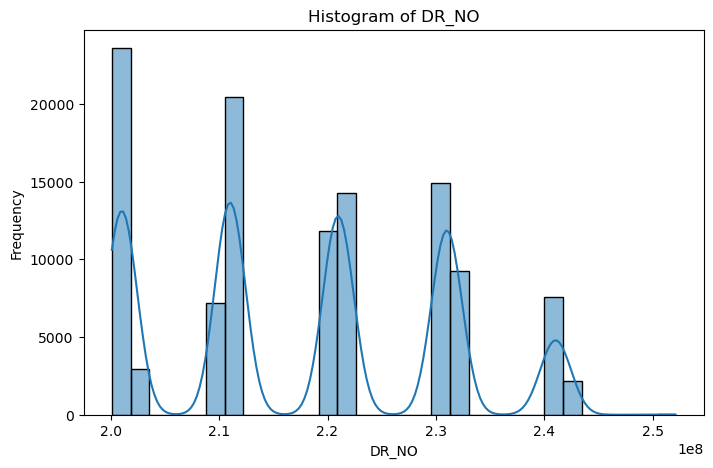

In [ ]:
# Create a folder to save plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Histogram for each numerical column
numerical_cols = ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'{plot_dir}/histogram_{col}.png')
    plt.show()

# Bar graphs for each categorical column
categorical_cols = ['AREA NAME']
# I tried the other categorical columns, they don't make sense for a bar graph
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    top_30 = df[col].value_counts().nlargest(30).index
    sns.countplot(y=df[col], order=top_30, palette='viridis')
    plt.title(f'Bar Graph of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.savefig(f'{plot_dir}/bargraph_{col}.png')
    plt.show()
    plt.close()

# Violin plots for selected pairs (categorical vs numerical)
violin_categorical = ['Vict Sex', 'Crm Cd Desc', 'Premis Desc']
violin_numerical = ['Vict Age', 'Vict Age', 'Vict Age']

for cat_col, num_col in zip(violin_categorical, violin_numerical):
    top_10_categories = df[cat_col].value_counts().nlargest(10).index  # Get top 30 categories
    subset_df = df[df[cat_col].isin(top_10_categories)]  # Filter dataset to only include these categories

    plt.figure(figsize=(12, 6))
    sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")
    plt.title(f'Violin Plot of {num_col} by {cat_col} (Top 10 Categories)')
    plt.xticks(rotation=45)
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.show()
    plt.savefig(f'{plot_dir}/violin_{num_col}_by_{cat_col}.png')
    plt.close()

# Scatter plots for selected numerical pairs
selected_num_pairs = [('DR_NO', 'TIME OCC'), ('TIME OCC', 'Vict Age'), ('Crm Cd', 'Rpt Dist No')]

for x_col, y_col in selected_num_pairs:
    plt.figure(figsize=(8, 6))
    top_x_values = df[x_col].value_counts().nlargest(10).index
    top_y_values = df[y_col].value_counts().nlargest(10).index
    subset_df = df[(df[x_col].isin(top_x_values)) & (df[y_col].isin(top_y_values))]
    sns.scatterplot(x=subset_df[x_col], y=subset_df[y_col], alpha=0.5)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.savefig(f'{plot_dir}/scatter_{x_col}_vs_{y_col}.png')
    plt.show()
    plt.close()
    

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig(f'{plot_dir}/correlation_heatmap.png')
plt.show()
plt.close()

# Additional Plots
# Plot 1: Box plot of Victim Age across Crime Types
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Crm Cd Desc'].value_counts().nlargest(30).index, y=df['Vict Age'].value_counts().nlargest(30).index)
plt.xticks(rotation=90)
plt.title('Box Plot of Victim Age Across Crime Types')
plt.savefig(f'{plot_dir}/boxplot_victim_age_by_crime.png')
plt.show()
plt.close()

# Plot 2: KDE plot of latitude and longitude
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['LAT'].value_counts().nlargest(30).index, y=df['LON'].value_counts().nlargest(30).index, cmap="Reds", fill=True)
plt.title('Density Plot of Crime Locations')
plt.savefig(f'{plot_dir}/kde_crime_locations.png')
plt.show()
plt.close()



Unit Tests